# Analysis of Shocks to Stock Indexes Caused By US Presidential Elections  
Authored by: Connor Blackburn, Thomas Ghidey, Kevin Li, and Paul Yoon

## Data Collection  

  Data is gathered from Yahoo Finance using their API package called 'yfinance'.

In [1]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas_datareader
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import pandas_datareader.data as web
import yfinance as yf
import seaborn as sns

start = dt.datetime(1990, 1, 1)
end = dt.datetime(2024, 11, 30)

### **Domestic Stock Index Data**  

- **S&P 500**: A broad index representing the performance of 500 large-cap U.S. companies across all industries.
- **S&P 100**: A subset of the S&P 500, focusing on 100 of the largest blue-chip companies with high liquidity.  
  
>**S&P 500 Sectors Classified Under Global Industry Classification Standard**

- **S&P Technology Select Sector (XLK)**: Includes companies focused on software, hardware, IT services, and semiconductor production.
- **S&P Health Care Select Sector (XLV)**: Covers firms in biotechnology, pharmaceuticals, healthcare providers, and medical equipment.
- **S&P Energy Select Sector (XLE)**: Represents companies engaged in oil, gas, and renewable energy production and exploration.
- **S&P Financial Select Sector (XLF)**: Tracks banks, insurance firms, asset management companies, and other financial services.
- **S&P Consumer Discretionary Select Sector (XLY)**: Comprises companies providing non-essential goods and services like retail, entertainment, and automotive.
- **S&P Utilities Select Sector (XLU)**: Focuses on companies delivering electricity, water, and other utilities to consumers and businesses.
>Notably, these are only 6 of the 11 GICS Sectors. These 6 were chosen for having the highest relavence to Election policy impacts, as well as for clarity.
>
>All Data is of Closing Prices.

### Volatility Index

- **VIX Index**: The CBOE Volatility Index, commonly referred to as the "Fear Index," measures the market's expectation of future volatility based on S&P 500 options. It serves as a forward-looking indicator of investor sentiment and market risk.

In [3]:
yfcodes = [
    "^GSPC",  # S&P 500
    "^OEX",   # S&P 100
    "XLK",    # S&P Technology Select Sector
    "XLV",    # S&P Health Care Select Sector
    "XLE",    # S&P Energy Select Sector
    "XLF",    # S&P Financial Select Sector
    "XLY",    # S&P Consumer Discretionary Select Sector
    "XLU",    # S&P Utilities Select Sector
    "^VIX",   # S&P 500 Volatility Index "Fear Index"
]
spdata = yf.download(yfcodes, start, end)['Close']
names = {
    "^GSPC": "sp500",
    "^OEX": "sp100",
    "XLK": "Tech",
    "XLV": "Health",
    "XLE": "Energy",
    "XLF": "Finance",
    "XLY": "Consumer",
    "XLU": "Utilities",
    "^VIX": "fear"
}
spdata = spdata.rename(columns = names)

[*********************100%***********************]  9 of 9 completed


### **International Stock Indexes**

- **Shanghai Composite Index (China)**: Tracks all stocks listed on the Shanghai Stock Exchange, primarily representing mainland China's equity market performance.
- **Nikkei 225 (Japan)**: A price-weighted index tracking 225 large-cap companies listed on the Tokyo Stock Exchange, serving as a benchmark for Japan’s stock market.
- **EURO STOXX 50 (Eurozone)**: Represents 50 of the largest and most liquid companies in the Eurozone, spanning various industries.
- **S&P/TSX Composite Index (Canada)**: Canada’s main stock market index, covering approximately 250 of the largest companies listed on the Toronto Stock Exchange.

>All Data is of Closing Prices.

In [14]:
intcodes = [
    "000001.SS",  # Shanghai Composite Index (China)
    "^N225",      # Nikkei 225 (Japan)
    "^STOXX50E",  # EURO STOXX 50 (Eurozone)
    "^GSPTSE"     # S&P/TSX Composite Index (Canada)
]
interdata = yf.download(intcodes, start, end)['Close']

internames = {
    "000001.SS": "China",         # Shanghai Composite Index
    "^N225": "Japan",             # Nikkei 225
    "^STOXX50E": "Eurozone",      # EURO STOXX 50
    "^GSPTSE": "Canada"           # S&P/TSX Composite Index
}

interdata = interdata.rename(columns = internames)

[*********************100%***********************]  4 of 4 completed


>Data gathering dates ranged from Jan 1, 1990 to Nov 30, 2024

## Analysis  

Graph of S&P 500 Closing Prices Normalized to Election Dates of Trump 2016 and Obama 2012.

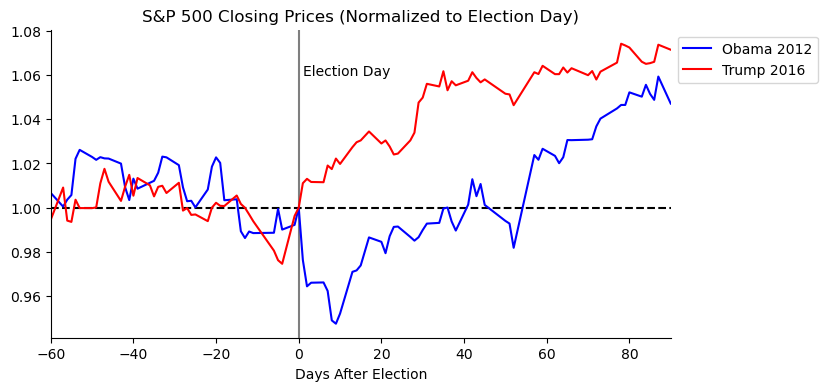

In [8]:
# Date of Obama Election
obama_election = dt.datetime(2012, 11, 6)
# ~2 Month before Obama Election to provide Context
obamastart = obama_election - dt.timedelta(days = 60)
# ~3 Months after Obama Election to view immediate effects
obamaend = obama_election + dt.timedelta(days = 90)

# Select sp550 and sp100 from the ~5 month range for Obamas Election
spobama = spdata[['sp500', 'sp100']].copy()
spobama = spobama[(spobama.index >= obamastart) & (spobama.index <= obamaend)]
# Normalize Data to Election Day
spobama = spobama / spobama.loc[obama_election]
spobama["Days After Election"] = (spobama.index - obama_election).days

# Date of Trump Election
trump_election = dt.datetime(2016, 11, 8)
# ~2 Month before Trump Election to provide Context
trumpstart = trump_election - dt.timedelta(days = 60)
# ~3 Months after Trump Election to view immediate effects
trumpend = trump_election + dt.timedelta(days = 90)

# Selectsp550 and sp100 from the ~5 month range for Trumps Election
sptrump = spdata[['sp500', 'sp100']].copy()
sptrump = sptrump[(sptrump.index >= trumpstart) & (sptrump.index <= trumpend)]
# Normalize Data to Election Day
sptrump = sptrump / sptrump.loc[trump_election]
sptrump["Days After Election"] = (sptrump.index - trump_election).days

# Merge Data
spmerge = pd.merge(left = sptrump, right = spobama, left_on = 'Days After Election', right_on = 'Days After Election', how = 'inner')
spmerge.set_index('Days After Election', inplace = True)
spmerge.columns = ['trump500', 'trump100', 'obama500', 'obama100']

# Plot S&P 500 Data
fig, ax = plt.subplots(figsize = (8, 4))

names = ['Obama 2012', 'Trump 2016']
cols = ['blue', 'red']
data = ['obama500', 'trump500']

for n, c, d in zip(names, cols, data):
    ax.plot(spmerge.index, spmerge[d], color = c, label = n)

ax.axhline(y =1 , linestyle = 'dashed', color = 'black', zorder = 0)
ax.axvline(x = 0, linestyle = 'solid', alpha = 0.5, color = 'black', zorder = 0)

ax.set_xlabel('Days After Election')
ax.set_title('S&P 500 Closing Prices (Normalized to Election Day)')
ax.text(1, 1.06, "Election Day", color = 'black')
ax.set_xlim(-60,90)

sns.despine()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

Graph of S&P 100 Closing Prices Normalized to Election Dates of Trump 2016 and Obama 2012.

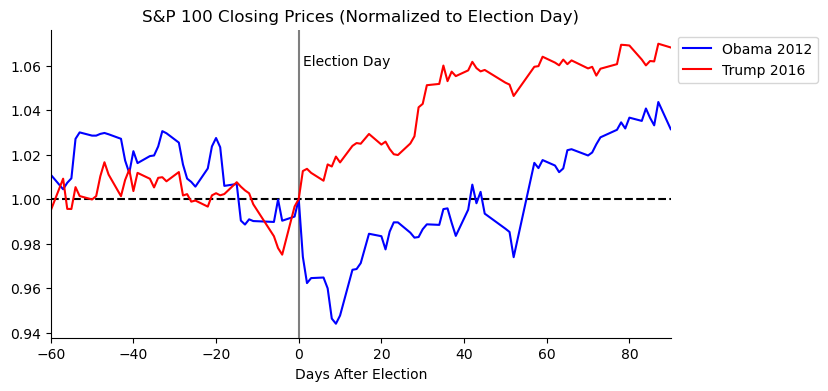

In [5]:
# Plot S&P 100 Data
fig, ax = plt.subplots(figsize = (8, 4))

data = ['obama100', 'trump100']

for n, c, d in zip(names, cols, data):
    ax.plot(spmerge.index, spmerge[d], color = c, label = n)

ax.axhline(y =1 , linestyle = 'dashed', color = 'black', zorder = 0)
ax.axvline(x = 0, linestyle = 'solid', alpha = 0.5, color = 'black', zorder = 0)

ax.set_xlabel('Days After Election')
ax.set_title('S&P 100 Closing Prices (Normalized to Election Day)')
ax.text(1, 1.06, "Election Day", color = 'black')
ax.set_xlim(-60,90)

sns.despine()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

Graph of Volatility Index surrounding Election Dates of Trump 2016 and Obama 2012

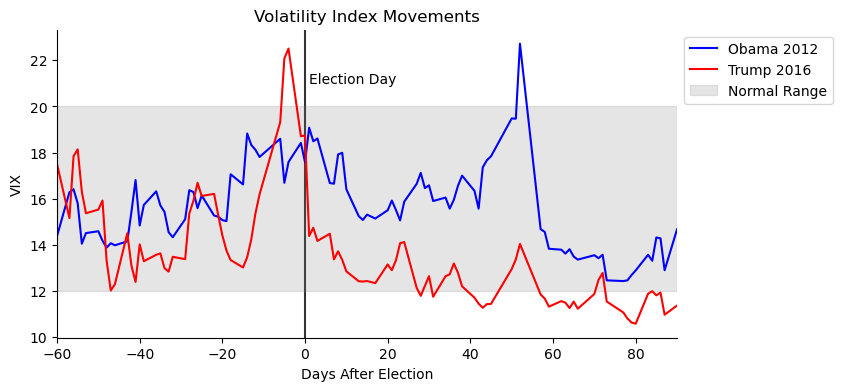

In [6]:
# Create Dataframe with VIX Data
vix = spdata[['fear']]
alltimemean = vix.fear.mean()

# Select VIX from the ~5 month range for Obamas Election
vobama = vix[(vix.index >= obamastart) & (vix.index <= obamaend)].copy()
vobama["Days After Election"] = (vobama.index - obama_election).days

# Select VIX from the ~5 month range for Trumps Election
vtrump = vix[(vix.index >= trumpstart) & (vix.index <= trumpend)].copy()
vtrump["Days After Election"] = (vtrump.index - trump_election).days

# Merge Data
vmerge = spmerge = pd.merge(left = vtrump, right = vobama, left_on = 'Days After Election', right_on = 'Days After Election', how = 'inner')
vmerge.set_index('Days After Election', inplace = True)
vmerge.columns = ['trumpv', 'obamav']

# Plot S&P 100 Data
fig, ax = plt.subplots(figsize = (8, 4))

data = ['obamav', 'trumpv']

for n, c, d in zip(names, cols, data):
    ax.plot(vmerge.index, vmerge[d], color = c, label = n)

ax.axvline(x = 0, linestyle = 'solid', alpha = 0.8, color = 'black', zorder = 0)
ax.axhspan(12, 20, color='grey', alpha=0.2, label="Normal Range")

ax.set_xlabel('Days After Election')
ax.set_ylabel('VIX')
ax.set_title('Volatility Index Movements')
ax.text(1, 21, "Election Day", color = 'black')
ax.set_xlim(-60,90)

sns.despine()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

Graph of Sector Closing Prices for Obama 2012

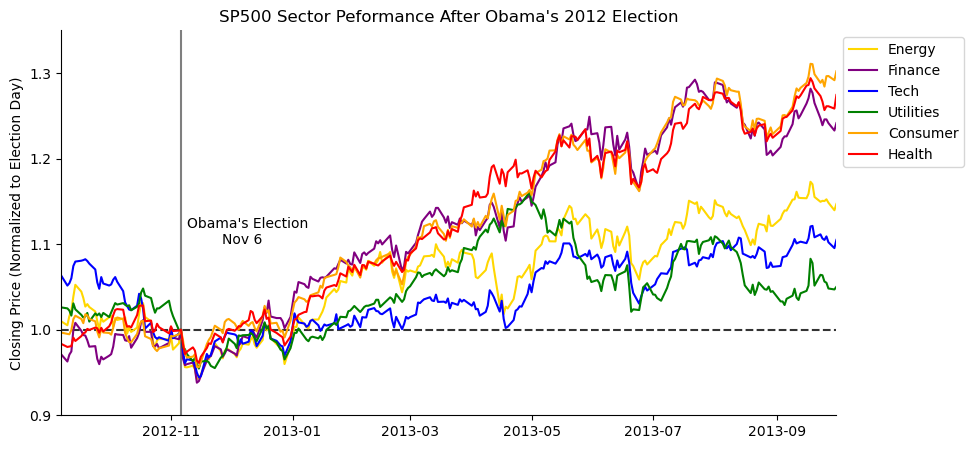

In [10]:
#Create Dataframe with Sector Data
sectors = ['Energy','Finance','Tech', 'Utilities', 'Consumer', 'Health']
sp_sectors = spdata[sectors]

# Select Sector data
obamaend = dt.datetime(2013, 10, 1)
obama_sectors = sp_sectors[(sp_sectors.index >= obamastart) & (sp_sectors.index <= obamaend)].copy()
obama_sectors = obama_sectors / obama_sectors.loc[obama_election]

# Plot Obama Sector Data
fig, ax = plt.subplots(figsize = (10, 5))

cols = ['gold', 'purple', 'blue', 'green', 'orange', 'red']

for s, col in zip(sectors, cols):
    ax.plot(obama_sectors.index, obama_sectors[s], color=col, label=s)


ax.set_ylabel('Closing Price (Normalized to Election Day)')
ax.set_ylim(.9, 1.35)
ax.set_title('SP500 Sector Peformance After Obama\'s 2012 Election')
ax.axhline(y=1, color='black', alpha=.8, linestyle='--', zorder=0)
ax.axvline(obama_election, color='black', alpha=0.5, zorder = 0)
ax.text(obama_election + dt.timedelta(days = 3), 1.1, 'Obama\'s Election\n        Nov 6', color='black')
ax.set_xlim(obamastart, obamaend)

sns.despine()
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Graph of Sector Closing Prices for Trump 2016

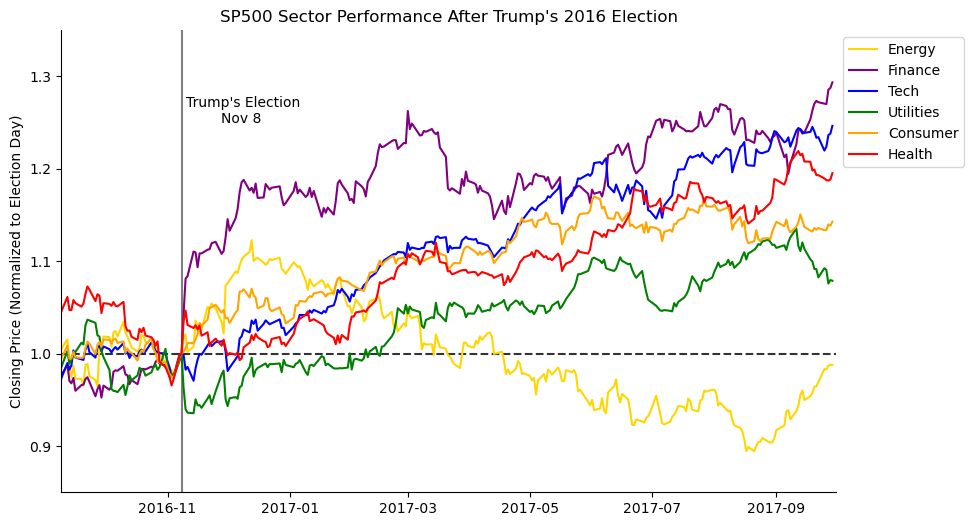

In [11]:
# Select Sector data 
trumpend = dt.datetime(2017, 10, 1)
trump_sectors = sp_sectors[(sp_sectors.index >= trumpstart) & (sp_sectors.index <= trumpend)]
trump_sectors = trump_sectors / trump_sectors.loc[trump_election]

#Plot Trump Sector Data
fig, ax = plt.subplots(figsize = (10, 6))

cols = ['gold', 'purple', 'blue', 'green', 'orange', 'red']

for s, col in zip(sectors, cols):
    ax.plot(trump_sectors.index, trump_sectors[s], color=col, label=s)
    

ax.set_ylabel('Closing Price (Normalized to Election Day)')
ax.set_ylim(.85, 1.35)
ax.set_title('SP500 Sector Performance After Trump\'s 2016 Election')
ax.axhline(y=1, color='black', alpha=.8, linestyle='--', zorder=0)
ax.axvline(trump_election, color='black', alpha=0.5, zorder = 0)
ax.text(trump_election + dt.timedelta(days = 2), 1.25, 'Trump\'s Election\n        Nov 8', color='black')
ax.set_xlim(trumpstart, trumpend)

sns.despine()
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Graph of International Stock Indexes vs. S&P 500 Closing Prices following Obama 2012

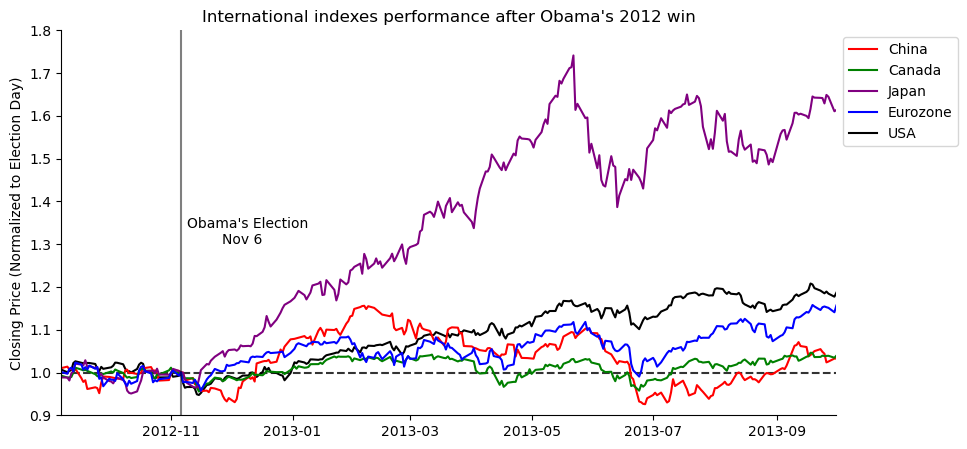

In [9]:
# Merge S&P 500 data for comparison
interdata = pd.merge(left = interdata, right = spdata[['sp500']], left_on = 'Date', right_on = 'Date', how = 'inner')

# Select International Data for Obama
interdata1 = interdata[(interdata.index >= obamastart) & (interdata.index <= obamaend)].copy()
interdata1 = interdata1 / interdata1.loc[obama_election]
interdata1 = interdata1.interpolate(method='linear')

#Plot International Obama Data
fig, ax = plt.subplots(figsize=(10,5))

countries = ['China','Canada','Japan', 'Eurozone', "sp500"]
cols = ['red', 'green', 'purple', 'blue', 'black']
labels = ['China', 'Canada', 'Japan', 'Eurozone', "USA"]
order = [1, 1, 1, 1, 0]

for n, c, l, o in zip(countries, cols, labels, order):
    ax.plot(interdata1.index, interdata1[n], color=c, label=l, zorder = o)

ax.set_ylabel('Closing Price (Normalized to Election Day)')
ax.set_ylim(.9, 1.8)
ax.set_title('International indexes performance after Obama\'s 2012 win')
ax.axhline(y=1, color='black', alpha=.8, linestyle='--', zorder=0)
ax.axvline(obama_election, color='black', alpha=0.5)
ax.text(obama_election + dt.timedelta(days = 3), 1.3, 'Obama\'s Election\n        Nov 6', color='black')
ax.set_xlim(obamastart, obamaend)

sns.despine()
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

Graph of International Stock Indexes vs. S&P 500 Closing Prices following Obama 2012

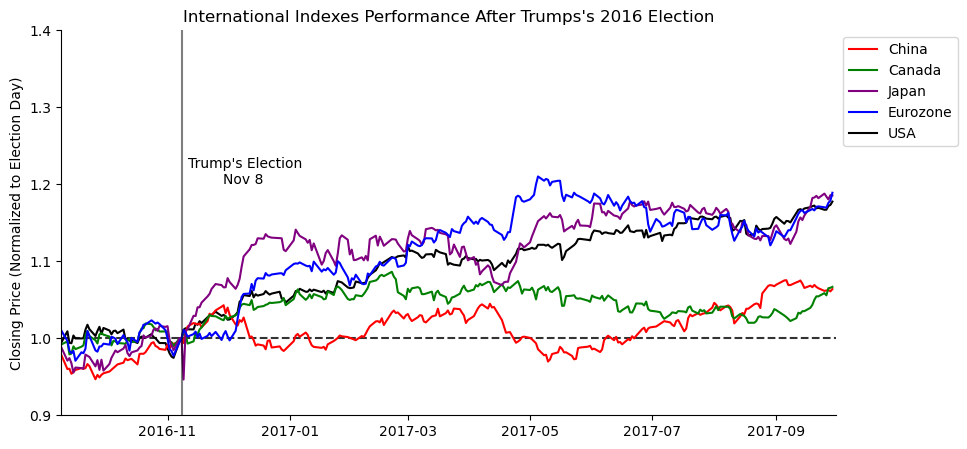

In [20]:
# Select International Data for Trump
interdata2 = interdata[(interdata.index >= trumpstart) & (interdata.index <= trumpend)].copy()
interdata2 = interdata2 / interdata2.loc[trump_election]
interdata2 = interdata2.interpolate(method='linear')

#Plot International Obama Data
fig, ax = plt.subplots(figsize=(10,5))

countries = ['China','Canada','Japan', 'Eurozone', "sp500"]
cols = ['red', 'green', 'purple', 'blue', 'black']
labels = ['China', 'Canada', 'Japan', 'Eurozone', "USA"]
order = [1, 1, 1, 1, 0]

for n, c, l, o in zip(countries, cols, labels, order):
    ax.plot(interdata2.index, interdata2[n], color=c, label=l, zorder = o)

ax.set_ylabel('Closing Price (Normalized to Election Day)')
ax.set_ylim(.9, 1.4)
ax.set_title('International Indexes Performance After Trumps\'s 2016 Election')
ax.axhline(y=1, color='black', alpha=.8, linestyle='--', zorder=0)
ax.axvline(trump_election, color='black', alpha=0.5)
ax.text(trump_election + dt.timedelta(days = 3), 1.2, 'Trump\'s Election\n        Nov 8', color='black')
ax.set_xlim(trumpstart, trumpend)

sns.despine()
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()